# MNIST Digit Classification using K-Nearest Neighbors (KNN)

This notebook explores the use of the K-Nearest Neighbors algorithm for classifying handwritten digits from the MNIST dataset.

## Objectives:
- Understand how different values of `k` impact model performance.
- Preprocess and reshape image data for compatibility with KNN.
- Evaluate and visualize model performance.

In [ ]:
# Imports and dataset loading for KNN

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the MNIST dataset:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


## For Exploratory Data Analysis (EDA), please see naive_bayes_classifiers.ipynb

In [ ]:
# Data pre-processing:

# Normalize pixel values to [0, 1]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape 28x28 images to 784-dim vectors:
train_2d = x_train.reshape((x_train.shape[0], -1))
test_2d = x_test.reshape((x_test.shape[0], -1))

In [3]:
# KNN modeling and evaluation using different k's.

k_values = [2, 3, 4, 5]
train_accuracies = []
test_accuracies = []
confusion_matrices = []

for k in k_values:
    print(f"\n===== KNN with k = {k} =====")

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_2d, y_train)

    # Training set evaluation
    y_train_pred = knn.predict(train_2d)
    train_acc = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_acc:.2f}")
    print("Classification Report (Train):")
    print(classification_report(y_train, y_train_pred))

    # Test set evaluation
    y_test_pred = knn.predict(test_2d)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_acc:.2f}")
    print("Classification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    # Save results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    confusion_matrices.append(confusion_matrix(y_test, y_test_pred))


===== KNN with k = 2 =====
Training Accuracy: 0.99
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5923
           1       0.97      1.00      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.97      0.99      0.98      6131
           4       0.98      0.99      0.99      5842
           5       0.98      0.98      0.98      5421
           6       1.00      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       1.00      0.95      0.97      5851
           9       1.00      0.96      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

Test Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980

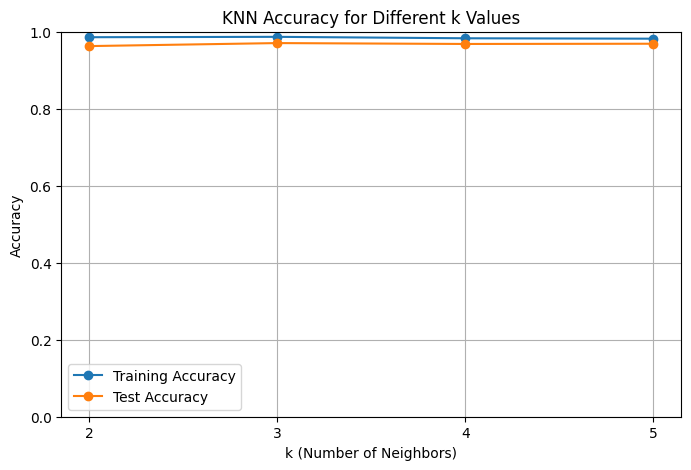

In [5]:
# Visaluzing the results:

plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.ylim(0, 1.0)
plt.grid(True)
plt.legend()
plt.show()


Best performing model: k = 3 with Test Accuracy = 0.97


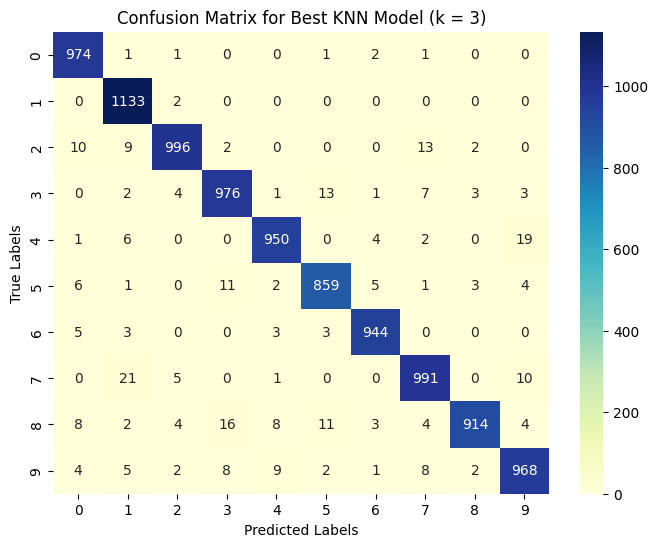

In [4]:
# Confusion matrix for the best model:

best_k_index = np.argmax(test_accuracies)
best_k = k_values[best_k_index]
best_cm = confusion_matrices[best_k_index]

print(f"\nBest performing model: k = {best_k} with Test Accuracy = {test_accuracies[best_k_index]:.2f}")

plt.figure(figsize=(8,6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Confusion Matrix for Best KNN Model (k = {best_k})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()